In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
a = 2 + 3j
b = 4 + 5j

In [8]:
type(a)

complex

In [67]:
r, i = np.meshgrid(np.array(range(-10, 10)), np.array(range(-10, 10)))
z = r + i*1j

In [68]:
zz = z * z * z + 1
zz

array([[  2.00100000e+03 -2.00000000e+03j,
          1.97200000e+03 -1.43000000e+03j,
          1.88900000e+03 -9.20000000e+02j,
          1.75800000e+03 -4.70000000e+02j,
          1.58500000e+03 -8.00000000e+01j,
          1.37600000e+03 +2.50000000e+02j,
          1.13700000e+03 +5.20000000e+02j,
          8.74000000e+02 +7.30000000e+02j,
          5.93000000e+02 +8.80000000e+02j,
          3.00000000e+02 +9.70000000e+02j,
          1.00000000e+00 +1.00000000e+03j,
         -2.98000000e+02 +9.70000000e+02j,
         -5.91000000e+02 +8.80000000e+02j,
         -8.72000000e+02 +7.30000000e+02j,
         -1.13500000e+03 +5.20000000e+02j,
         -1.37400000e+03 +2.50000000e+02j,
         -1.58300000e+03 -8.00000000e+01j,
         -1.75600000e+03 -4.70000000e+02j,
         -1.88700000e+03 -9.20000000e+02j,
         -1.97000000e+03 -1.43000000e+03j],
       [  1.43100000e+03 -1.97100000e+03j,
          1.45900000e+03 -1.45800000e+03j,
          1.43300000e+03 -9.99000000e+02j,
          

In [71]:
z_r, z_i = zz.real, zz.imag

In [76]:
z_r.flatten().shape

(400,)

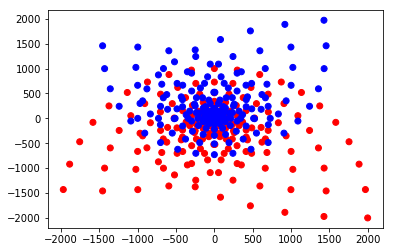

In [78]:
plt.scatter(z_r.flatten(), z_i.flatten(), c=["r"]*200+["b"]*200)

In [83]:
theta = np.arctan2(i, r)
theta.shape

(20, 20)

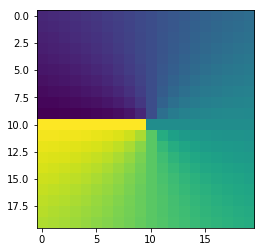

In [84]:
plt.imshow(theta)

(-500, 500)

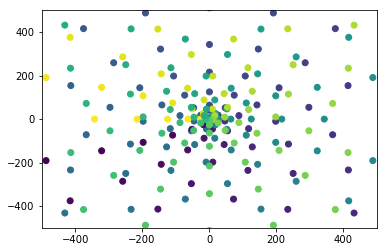

In [88]:
plt.scatter(z_r.flatten(), z_i.flatten(), c=theta.flatten())
plt.xlim(-500, 500)
plt.ylim(-500, 500)

(-5, 5)

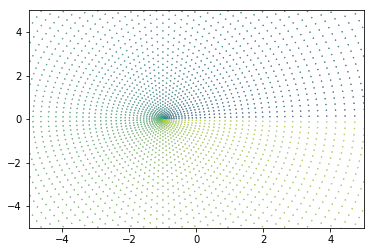

In [107]:
r, i = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
z = r + i*1j

zz = z * z - 1
z_r, z_i = zz.real, zz.imag

theta = np.arctan2(i, r)

plt.scatter(z_r.flatten(), z_i.flatten(), c=theta.flatten(), s=0.1)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

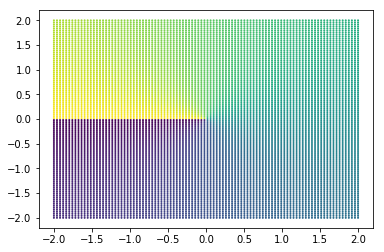

In [105]:
plt.scatter(r.flatten(), i.flatten(), c=theta, s=1)

(-2, 2)

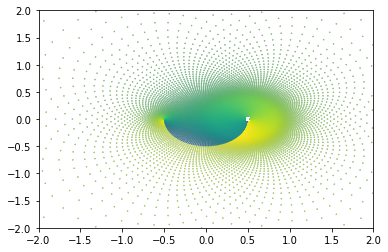

In [110]:
r, i = np.meshgrid(np.linspace(-4, 4, 400), np.linspace(-4, 4, 400))
z = r + i*1j

zz = (z * z - 1j)/(2*z*z + 2j)
z_r, z_i = zz.real, zz.imag

theta = np.arctan2(i, r)

plt.scatter(z_r.flatten(), z_i.flatten(), c=theta.flatten(), s=0.1)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

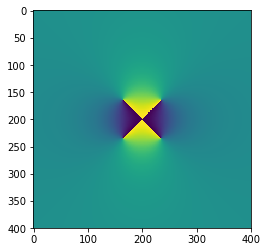

In [113]:
# ひょっとして移動先をもとに色分け？
fuga = np.arctan2(z_i, z_r)
plt.imshow(fuga)

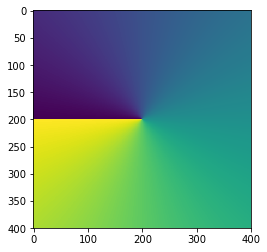

In [114]:
plt.imshow(np.arctan2(i, r))

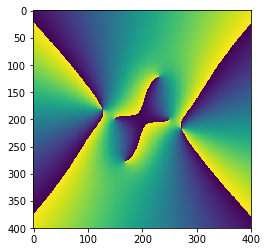

In [119]:
r, i = np.meshgrid(np.linspace(-4, 4, 400), np.linspace(-4, 4, 400))
z = r + i*1j

zz = (z*z-1)*(z*z-2-1j)**2 / (z*z+2+2j)
z_r, z_i = zz.real, zz.imag

# ひょっとして移動先をもとに色分け？
fuga = np.arctan2(z_i, z_r)
plt.imshow(fuga)

In [120]:
def plot_complex(c_func):
    r, i = np.meshgrid(np.linspace(-4, 4, 400), np.linspace(-4, 4, 400))
    z = r + i*1j

    zz = c_func(z)
    z_r, z_i = zz.real, zz.imag

    # ひょっとして移動先をもとに色分け？
    fuga = np.arctan2(z_i, z_r)
    plt.imshow(fuga)

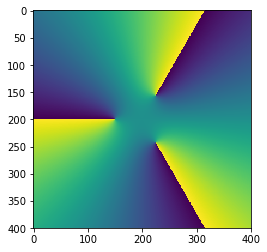

In [121]:
plot_complex(lambda z: z**3 + 1)

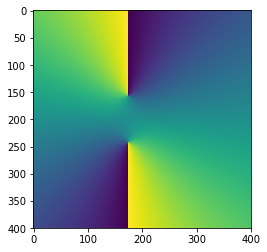

In [124]:
plot_complex(lambda z: (z**3-1)/(z-1))

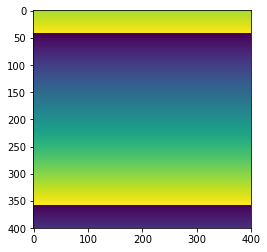

In [125]:
plot_complex(lambda z: np.exp(z))

In [126]:
from scipy import special

In [131]:
special.digamma(2j)

(0.71459151537397769+1.8208072826422304j)

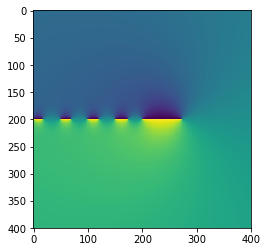

In [132]:
plot_complex(special.digamma)

In [135]:
r, i = np.meshgrid(np.linspace(-4, 4, 400), np.linspace(-4, 4, 400))

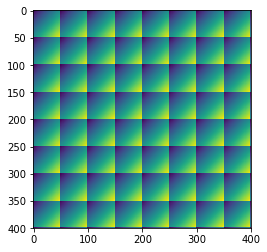

In [139]:
plt.imshow((r-np.floor(r)) + (i-np.floor(i)))

(-2, 2)

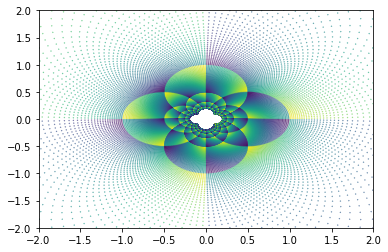

In [144]:
r, i = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
z = r + i*1j

zz = 1/z
z_r, z_i = zz.real, zz.imag

theta = np.arctan2(i, r)
hoge = (r-np.floor(r)) + (i-np.floor(i))

plt.scatter(z_r.flatten(), z_i.flatten(), c=hoge.flatten(), s=0.1)
plt.xlim(-2, 2)
plt.ylim(-2, 2)

In [146]:
def plot_conformal(func):
    r, i = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
    z = r + i*1j

    zz = func(z)
    z_r, z_i = zz.real, zz.imag

    theta = np.arctan2(i, r)
    hoge = (r-np.floor(r)) + (i-np.floor(i))

    plt.scatter(z_r.flatten(), z_i.flatten(), c=hoge.flatten(), s=0.1)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)

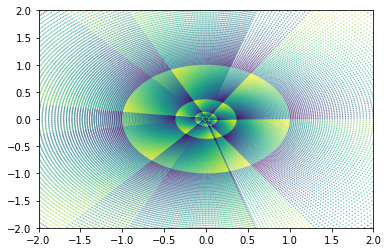

In [152]:
plot_conformal(np.exp)

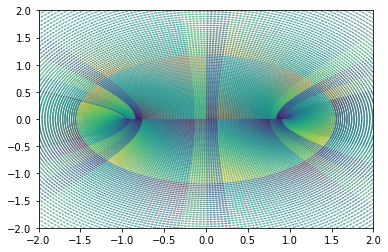

In [153]:
plot_conformal(np.sin)